1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

2. Load Dataset

In [3]:
# Load physiological data
data = pd.read_csv('dataset.csv')

# Display basic information
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HR      500 non-null    int64  
 1   RR      500 non-null    int64  
 2   EDA     500 non-null    float64
 3   EEG     500 non-null    float64
 4   chills  500 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 19.7 KB
None
   HR  RR       EDA       EEG  chills
0  67  16  0.095847  0.402087       0
1  68  12  0.012602 -0.567817       1
2  70  19  0.015532 -1.823327       0
3  79  12  0.074523  0.951863       0
4  99  16  0.087873  1.520443       1


3. Exploratory Data Analysis (EDA)

In [5]:
# Check for missing values
print(data.isnull().sum())

HR        0
RR        0
EDA       0
EEG       0
chills    0
dtype: int64


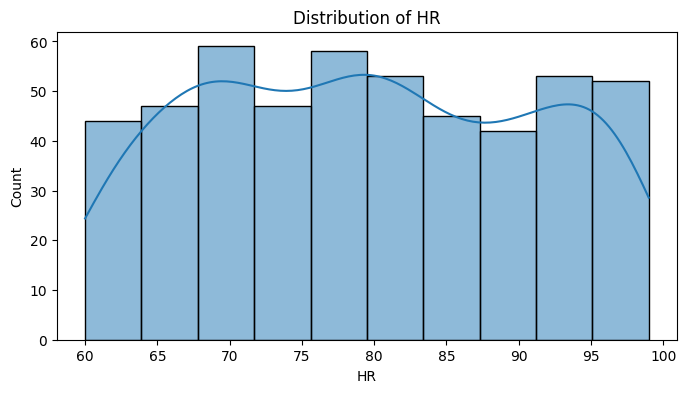

In [6]:
# Plot distributions of HR
plt.figure(figsize=(8, 4))
sns.histplot(data["HR"], kde=True)
plt.title(f'Distribution of HR')
plt.show()

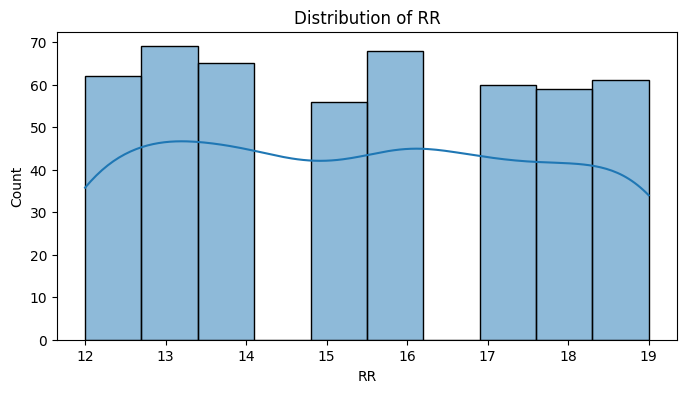

In [7]:
# Plot distributions of RR
plt.figure(figsize=(8, 4))
sns.histplot(data["RR"], kde=True)
plt.title(f'Distribution of RR')
plt.show()

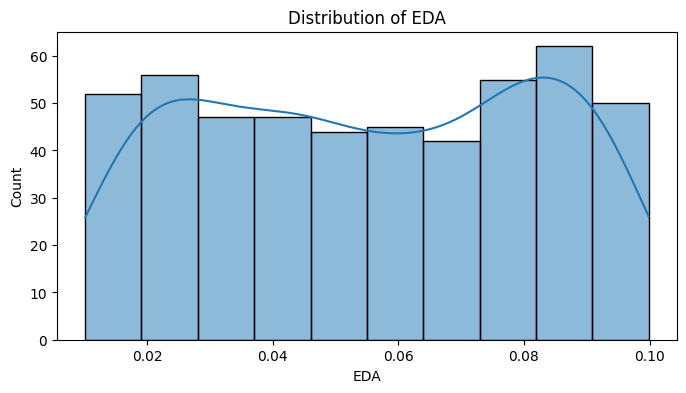

In [8]:
# Plot distributions of EDA
plt.figure(figsize=(8, 4))
sns.histplot(data["EDA"], kde=True)
plt.title(f'Distribution of EDA')
plt.show()

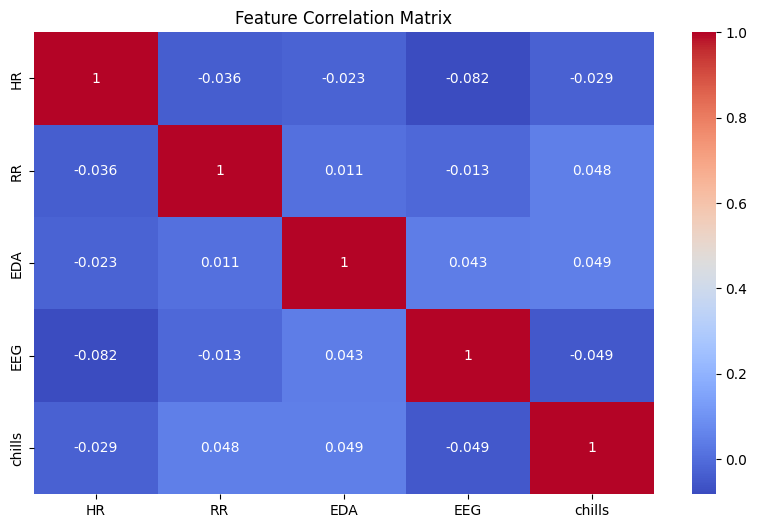

In [9]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

4. Data Preprocessing

In [17]:
# Separate features and target
X = data[['HR', 'RR', 'EDA']]
y = data['chills']  # Target: Binary classification (1 for chills, 0 for no chills)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5. Model Development

In [18]:
# Initialize Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)

6. Model Evaluation

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       129
           1       0.00      0.00      0.00        21

    accuracy                           0.85       150
   macro avg       0.43      0.49      0.46       150
weighted avg       0.74      0.85      0.79       150

Accuracy: 0.85


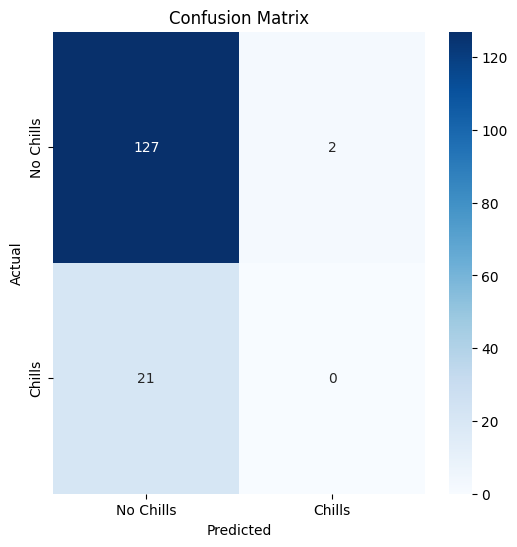

In [19]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Chills', 'Chills'], yticklabels=['No Chills', 'Chills'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

7. Feature Importance Analysis

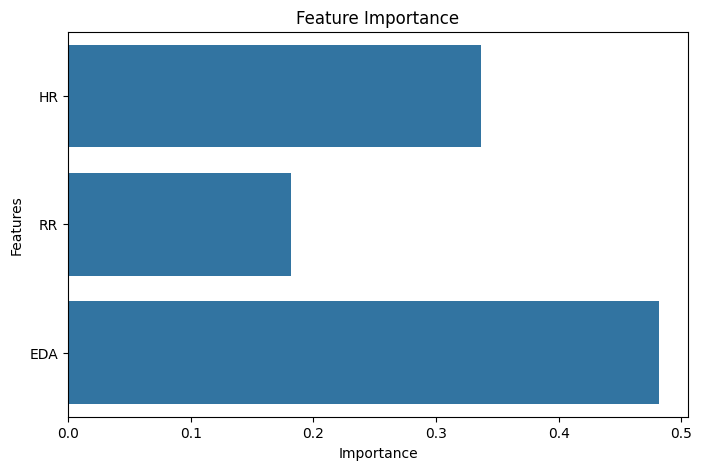

In [20]:
# Plot feature importance
importances = best_model.feature_importances_
features = ['HR', 'RR', 'EDA']
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

8. Save the Model

In [21]:
import joblib

# Save the model
joblib.dump(best_model, 'chills_prediction_model.pkl')

# Load the model
loaded_model = joblib.load('chills_prediction_model.pkl')